In [0]:
import numpy as np
from numpy import loadtxt
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive


In [0]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

In [0]:
train_dataset, val_dataset, test_dataset = loadData(True, 20)

In [0]:
def loadData(isLSTMfirstLayer, valPercentage):
  trainX = np.loadtxt("PsiloClassifier/dataSplit/trainX.csv", delimiter= ",")
  trainY = np.loadtxt("PsiloClassifier/dataSplit/trainY.csv", delimiter= ",")
  testX = np.loadtxt("PsiloClassifier/dataSplit/testX.csv", delimiter= ",")
  testY = np.loadtxt("PsiloClassifier/dataSplit/testY.csv", delimiter= ",")

  val_size = int(trainX.shape[0]*valPercentage/100)

  valX = trainX[:val_size][:]
  trainX = trainX[val_size:][:]
  valY = trainY[:val_size]
  trainY = trainY[val_size:]

  if(isLSTMfirstLayer):
    shape = trainX.shape
    samples = shape[0]
    timesteps = shape[1]
    trainX = trainX.reshape(samples, timesteps, 1)

    shape= testX.shape
    samples = shape[0]
    timesteps = shape[1]
    testX = testX.reshape(samples, timesteps, 1)

    shape= valX.shape
    samples = shape[0]
    timesteps = shape[1]
    valX = valX.reshape(samples, timesteps, 1)

  trainX = trainX.astype('float32')
  testX = testX.astype('float32')
  valX = valX.astype('float32')
  trainY = trainY.astype('float32').reshape((-1,1))
  testY = testY.astype('float32').reshape((-1,1))
  valY = valY.astype('float32').reshape((-1,1))

  train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY))
  test_dataset = tf.data.Dataset.from_tensor_slices((testX, testY))
  val_dataset = tf.data.Dataset.from_tensor_slices((valX, valY))

  train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
  test_dataset = test_dataset.batch(BATCH_SIZE)
  val_dataset = val_dataset.batch(BATCH_SIZE)

  return train_dataset, val_dataset, test_dataset

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['binary_accuracy'])

In [0]:
history = model.fit(train_dataset, epochs=500, validation_data = val_dataset)
model.save('myModel')

Epoch 1/500
1292/1292 [==============================] - 20s 15ms/step - loss: 0.6935 - binary_accuracy: 0.5003 - val_loss: 0.6932 - val_binary_accuracy: 0.5020
Epoch 2/500
1292/1292 [==============================] - 19s 15ms/step - loss: 0.6932 - binary_accuracy: 0.5001 - val_loss: 0.6932 - val_binary_accuracy: 0.5020
Epoch 3/500
1292/1292 [==============================] - 19s 15ms/step - loss: 0.6930 - binary_accuracy: 0.5001 - val_loss: 0.6929 - val_binary_accuracy: 0.5020
Epoch 4/500
1292/1292 [==============================] - 19s 15ms/step - loss: 0.6927 - binary_accuracy: 0.5001 - val_loss: 0.6918 - val_binary_accuracy: 0.5020
Epoch 5/500
1292/1292 [==============================] - 19s 15ms/step - loss: 0.6924 - binary_accuracy: 0.5001 - val_loss: 0.6886 - val_binary_accuracy: 0.5019
Epoch 6/500
1292/1292 [==============================] - 19s 15ms/step - loss: 0.6918 - binary_accuracy: 0.5001 - val_loss: 0.6927 - val_binary_accuracy: 0.5020
Epoch 7/500
1292/1292 [===========

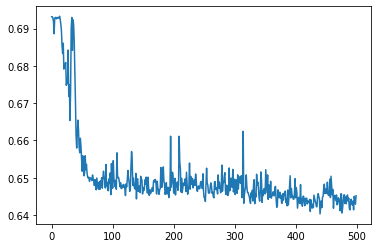

In [0]:
plt.plot(history.history['val_loss'])

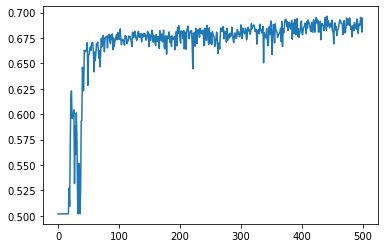

In [0]:
plt.plot(history.history['val_binary_accuracy'])

In [0]:
trainX = np.loadtxt("PsiloClassifier/dataSplit/trainX.csv", delimiter= ",")
trainY = np.loadtxt("PsiloClassifier/dataSplit/trainY.csv", delimiter= ",")
testX = np.loadtxt("PsiloClassifier/dataSplit/testX.csv", delimiter= ",")
testY = np.loadtxt("PsiloClassifier/dataSplit/testY.csv", delimiter= ",")

In [0]:
from tensorflow import keras
model = keras.models.load_model('PsiloClassifier/firstWorkingModel')

In [10]:
shape = testX.shape
samples = shape[0]
timesteps = shape[1]
testX = testX.reshape(samples, timesteps, 1)

y_new = model.predict_classes(testX)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
correct = [guess for ind, guess in enumerate(testY) if guess == y_new[ind]]

In [12]:
print(len(correct)/len(testY))

0.6309334236828731


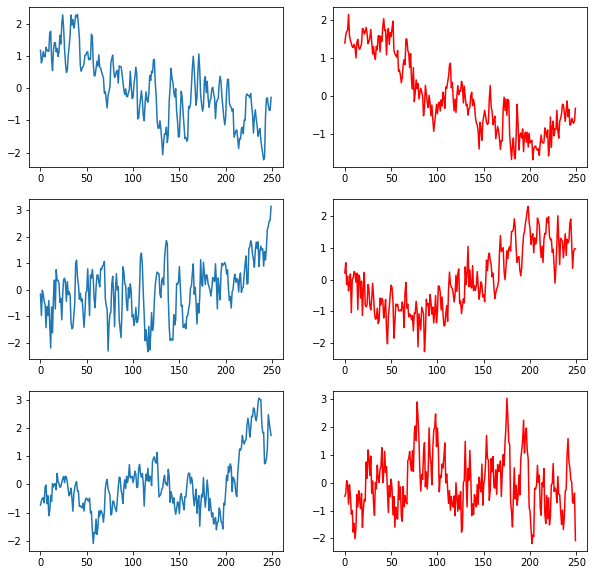

In [0]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(3, 2, 1)
ax2 = f.add_subplot(3, 2, 2)
ax3 = f.add_subplot(3, 2, 3)
ax4 = f.add_subplot(3, 2, 4)
ax5 = f.add_subplot(3, 2, 5)
ax6 = f.add_subplot(3, 2, 6)

ax.plot(testX[0])
ax2.plot(testX[2],'r')
ax3.plot(testX[3])
ax4.plot(testX[5], 'r')
ax5.plot(testX[7])
ax6.plot(testX[10], 'r')